In [2]:
from astropy.table import Table
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [3]:
tb1 = Table.read('/cargo/public/catdata/ml_train/dwarf/jdli21.fits',character_as_bytes=False)
df1 = tb1.to_pandas()

tb2 = Table.read('/cargo/public/catdata/ml_train/dwarf/Kirkpatrick_2019_TY.fit',character_as_bytes=False)
df2 = tb2.to_pandas()

tb3 = Table.read('/cargo/public/catdata/ml_train/dwarf/Lamost_ultralcool_dwarf.fits',character_as_bytes=False)
df3 = tb3.to_pandas()

tb4 = Table.read('/cargo/public/catdata/ml_train/dwarf/svo_late_type_subdwarf.fits',character_as_bytes=False)
df4 = tb4.to_pandas()

tb5 = Table.read('/cargo/public/catdata/ml_train/dwarf/ucd_ps1-result.fits',character_as_bytes=False)
df5 = tb5.to_pandas()

tb6 = Table.read('/cargo/public/catdata/ml_train/dwarf/West_2011_SDSS_M_Dwarf.fit',character_as_bytes=False)
df6 = tb6.to_pandas()

tb7 = Table.read('/cargo/public/catdata/ml_train/dwarf/ZhangZH_2018_L_subdwarf_tb7_pscoord.fits',character_as_bytes=False)
df7 = tb7.to_pandas()

In [17]:
df1_ = df1.rename(columns={'ra_obs':'ra','dec_obs':'dec'})
df2_ = df2.rename(columns={'_RAJ2000':'ra','_DEJ2000':'dec'})
df3_ = df3.rename(columns={'RAdeg':'ra','DEdeg':'dec'})
df4_ = df4.rename(columns={'RA':'ra','DEC':'dec'})
df6_ = df6.rename(columns={'RAJ2000':'ra','DEJ2000':'dec'})
df7_ = df7.rename(columns={'ra_ps':'ra','dec_ps':'dec'})


In [23]:
temp = pd.concat([df1_[['ra','dec']], df2_[['ra','dec']]])
temp = pd.concat([temp, df3_[['ra','dec']]])
temp = pd.concat([temp,df4_[['ra','dec']]])
temp = pd.concat([temp,df5[['ra','dec']]])
temp = pd.concat([temp,df6_[['ra','dec']]])
df = pd.concat([temp,df7_[['ra','dec']]])
df.reset_index(drop=True,inplace=True)
df
                           

,ra,dec
0,44.972425,0.238048
1,45.447768,0.688631
2,45.333593,0.806613
3,44.673272,0.442654
4,44.650587,0.595016
...,...,...
331360,276.536576,30.236253
331361,338.669939,0.167246
331362,344.758943,11.933832
331363,345.735530,12.219441


In [24]:
df.to_csv('dwarfs.csv',index=False)

In [32]:
from astropy.coordinates import SkyCoord
import astropy.units as u


coord = SkyCoord(ra=df.ra.values*u.deg,
                 dec=df.dec.values*u.deg,
                 frame='icrs')
df['l'] = coord.galactic.l.deg
df['b'] = coord.galactic.b.deg

<AxesSubplot:>

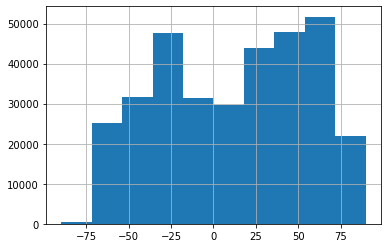

In [34]:
df.b.hist()

In [ ]:
# topcat和ps1 las cat交叉。las用3 arcsec，ps1和cat用1 arcsec

In [26]:
df1 = pd.read_csv('/cargo/public/catdata/ml_train/dwarf/dwarfsxps1xlasxcat.csv')

In [35]:
coord = SkyCoord(ra=df1.ra.values*u.deg,
                 dec=df1.dec.values*u.deg,
                 frame='icrs')
df1['l'] = coord.galactic.l.deg
df1['b'] = coord.galactic.b.deg

<AxesSubplot:>

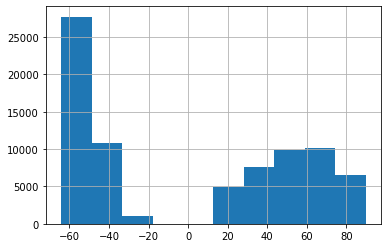

In [37]:
df1.b.hist()

In [ ]:
'source_id', 'ra', 'dec', 'w1ab', 'w2ab', 'gp', 'rp', 'ip', 'zp', 'yp',
       'jab', 'hab', 'kab', 'class'

In [29]:
for x in df1.columns:
    print(x)

ra
dec
objID
RAJ2000
DEJ2000
errHalfMaj
errHalfMin
errPosAng
f_objID
Qual
Epoch
Ns
Nd
gmag
e_gmag
gKmag
e_gKmag
gFlags
rmag
e_rmag
rKmag
e_rKmag
rFlags
imag
e_imag
iKmag
e_iKmag
iFlags
zmag
e_zmag
zKmag
e_zKmag
zFlags
ymag
e_ymag
yKmag
e_yKmag
yFlags
angDist
JName
ra_x
dec_x
yAperMag3
j_1AperMag3
hAperMag3
kAperMag3
yAperMag3Err
j_1AperMag3Err
hAperMag3Err
kAperMag3Err
sourceID
mode
epoch_x
mergedClass
angDist_x
objID_x
RAdeg
DEdeg
errHalfMaj_x
errHalfMin_x
errPosAng_x
Name
e_RAdeg
e_DEdeg
ePos
nW1
mW1
nW2
mW2
MJD
RAPMdeg
DEPMdeg
e_RAPMdeg
e_DEPMdeg
ePosPM
pmRA
pmDE
e_pmRA
e_pmDE
snrW1pm
snrW2pm
FW1pm
e_FW1pm
FW2pm
e_FW2pm
W1mproPM
e_W1mproPM
W2mproPM
e_W2mproPM
pmQual
Dist
chi2pmRA
chi2pmDE
ka
k1
k2
km
plx1
e_plx1
plx2
e_plx2
Sep
ccf
abfl
angDist_xa


In [44]:
df1_select = df1[['ra','dec','gmag','e_gmag','rmag','e_rmag','imag','e_imag','zmag','e_zmag','ymag','e_ymag','j_1AperMag3','j_1AperMag3Err',
                'hAperMag3','hAperMag3Err','kAperMag3','kAperMag3Err',
                 'W1mproPM','e_W1mproPM','W2mproPM','e_W2mproPM','snrW1pm','snrW2pm']]

df1_select.rename(columns={'imag':'ip'},inplace=True)

df1_good = df1_select.query("snrW1pm > 5 and snrW2pm > 3\
and W1mproPM > 8 and W2mproPM > 7\
and ip > 14\
and zmag > 0\
and ymag > 0\
and j_1AperMag3Err < 0.2171\
and e_imag < 0.2171")

df1_good.rename(columns={'gmag':'gp','rmag':'rp', 'zmag':'zp','ymag':'yp',
                         'j_1AperMag3':'jap','hAperMag3':'hap','kAperMag3':'kap',
                        'W1mproPM':'w1vega','W2mproPM':'w2vega'},inplace=True)

df1_good.eval('w1ab=w1vega+2.699',inplace=True)
df1_good.eval('w2ab=w2vega+3.339',inplace=True)
df1_good.eval('jab=jap+0.938',inplace=True)
df1_good.eval('hab=hap+1.379',inplace=True)
df1_good.eval('kab=kap+1.900',inplace=True)
                            
                            
df2_good = df1_good.query("ip <= 23.1\
            and zp <= 22.3\
            and yp <= 21.3\
            and jap<= 19.8")
df2_good.reset_index(inplace=True, drop=True)

df3 = df2_good[['ra', 'dec', 'w1ab', 'w2ab', 'gp', 'rp', 'ip', 'zp', 'yp', 'jab', 'hab','kab' ]]

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [46]:
df3.to_csv('/cargo/public/catdata/ml_train/dwarf_sample.csv',index=False)

In [47]:
df3.shape

(69994, 12)